In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import boto3
import os
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import random
!pip install streamlit
import streamlit as st

In [2]:
data_key = 'rating.tsv'
#data_location = 's3://{}/{}'.format(bucketname, data_key)
title_ratings = pd.read_csv(data_key,sep='\t')

data_key = 'basics_movie.tsv'
#data_location = 's3://{}/{}'.format(bucketname, data_key)
title_basics = pd.read_csv(data_key,sep='\t')

model_data = pd.merge(title_ratings,title_basics, on = 'tconst')

model_data.to_csv('projectdata.csv')


In [3]:
word_cloud_list = list(model_data.genres)
word_cloud_list = ','.join(word_cloud_list)
word_cloud_list = word_cloud_list.split(',')

word_could_dict = Counter(word_cloud_list)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
votes = model_data['numVotes']
m = votes.quantile(0.95)
C = model_data.averageRating.mean()

In [4]:
def weighted_ratings(model_data):
    v = model_data['numVotes']
    R = model_data['averageRating']
    return (v/(v+m) * R) + (m/(m+v) * C)
  
model_data['wr'] = model_data.apply(weighted_ratings, axis=1)
model_data = model_data.sort_values(by = ['wr'], ascending = False)

word_cloud_list = list(set(word_cloud_list))
for i in word_cloud_list:
    model_data[i] = 0
    
for i in model_data.index:
    x = model_data['genres'][i].split(',')
    for k in x:
        model_data[k][i] = 1

cluster_data = model_data[['primaryTitle'] + word_cloud_list]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cluster_data.iloc[:,1:])

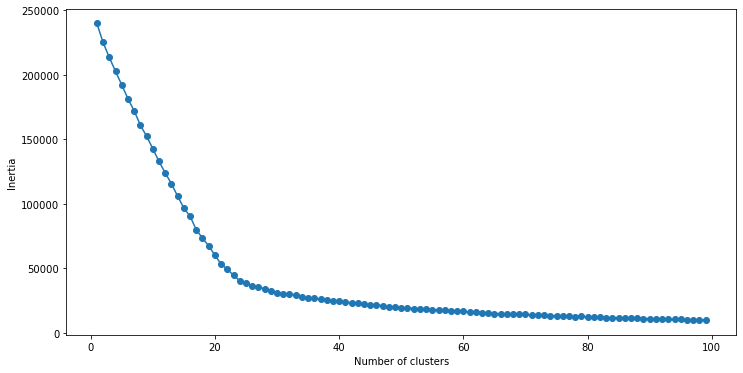

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,cluster
0,-0.288414,-0.169167,-0.110128,2.240692,-0.231459,-0.636332,1.156176,-0.151741,-0.148841,-0.147371,...,-0.170466,-0.192523,-0.083215,-0.102094,1.356536,-0.087549,-0.131035,-0.263256,-0.039566,16
1,-0.288414,-0.169167,-0.110128,-0.446291,-0.231459,-0.636332,1.156176,-0.151741,-0.148841,-0.147371,...,-0.170466,-0.192523,12.017034,-0.102094,-0.737172,-0.087549,-0.131035,-0.263256,-0.039566,5
2,-0.288414,-0.169167,9.080317,-0.446291,-0.231459,-0.636332,-0.864920,-0.151741,-0.148841,-0.147371,...,5.866284,-0.192523,-0.083215,-0.102094,-0.737172,-0.087549,-0.131035,-0.263256,-0.039566,15
3,-0.288414,-0.169167,-0.110128,-0.446291,4.320415,-0.636332,1.156176,-0.151741,-0.148841,-0.147371,...,-0.170466,-0.192523,-0.083215,-0.102094,1.356536,-0.087549,-0.131035,-0.263256,-0.039566,6
4,-0.288414,-0.169167,-0.110128,-0.446291,-0.231459,-0.636332,-0.864920,-0.151741,-0.148841,-0.147371,...,-0.170466,-0.192523,-0.083215,-0.102094,-0.737172,-0.087549,7.631562,-0.263256,-0.039566,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,-0.288414,-0.169167,-0.110128,2.240692,-0.231459,-0.636332,1.156176,-0.151741,-0.148841,-0.147371,...,-0.170466,-0.192523,-0.083215,-0.102094,-0.737172,-0.087549,-0.131035,-0.263256,-0.039566,16
9593,-0.288414,-0.169167,-0.110128,-0.446291,-0.231459,1.571506,-0.864920,-0.151741,-0.148841,-0.147371,...,-0.170466,-0.192523,-0.083215,-0.102094,1.356536,-0.087549,-0.131035,-0.263256,-0.039566,1
9594,-0.288414,-0.169167,-0.110128,-0.446291,4.320415,-0.636332,-0.864920,-0.151741,-0.148841,-0.147371,...,-0.170466,-0.192523,-0.083215,-0.102094,1.356536,-0.087549,-0.131035,-0.263256,-0.039566,6
9595,-0.288414,-0.169167,-0.110128,-0.446291,-0.231459,-0.636332,-0.864920,-0.151741,-0.148841,6.785582,...,5.866284,-0.192523,-0.083215,-0.102094,-0.737172,-0.087549,-0.131035,-0.263256,-0.039566,17


In [5]:

A = []
for cluster in range(1,100):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    A.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,100), 'E':A})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


data_scaled = data_scaled.astype('float32')
kmeans = KMeans(n_clusters=23, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
final = pd.DataFrame(data_scaled)
final['cluster'] = pred
final

In [6]:
def get_recommendations(title=None,types = None,ratings=None,year=None,genres=None):
    x = model_data
    if title != None:
        cluster_no = list(x[x['primaryTitle'].str.lower() == title.lower()]['cluster'])
        x = x[x['cluster'] == random.choice(cluster_no)]
    if types != None:
        x = x[x['titleType'].str.lower() == types.lower()]
    if year != None:
        x = x[x['startYear'] == year]
    if genres != None:
        list_of_genres = genres.split(',')
        x = x[x[genres.capitalize()] == 1]
    if ratings != None:
        x = x[x['wr'] >= ratings]
    
    return x[:15]

In [7]:
get_recommendations(types='short', genres='comedy', year=1918)

2022-05-05 08:16:25.485 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,Film-Noir,Mystery,Musical,Sci-Fi,Sport,Comedy,Biography,Music,Action,News
2430,tt0009018,7.7,8496,short,A Dog's Life,A Dog's Life,0,1918,\N,33,...,0,0,0,0,0,1,0,0,0,0
2565,tt0009611,7.3,6739,short,Shoulder Arms,Shoulder Arms,0,1918,\N,36,...,0,0,0,0,0,1,0,0,0,0
2391,tt0008874,6.7,1251,short,The Bell Boy,The Bell Boy,0,1918,\N,33,...,0,0,0,0,0,1,0,0,0,0
2420,tt0008975,6.6,1594,short,The Cook,The Cook,0,1918,\N,22,...,0,0,0,0,0,1,0,0,0,0
2525,tt0009466,6.4,1045,short,Out West,Out West,0,1918,\N,25,...,0,0,0,0,0,1,0,0,0,0
2580,tt0009678,6.5,518,short,Take a Chance,Take a Chance,0,1918,\N,10,...,0,0,0,0,0,1,0,0,0,0
2055,tt0007151,7.8,57,short,Out of the Inkwell,Out of the Inkwell,0,1918,\N,2,...,0,0,0,0,0,1,0,0,0,0
2497,tt0009316,6.5,187,short,"Look Pleasant, Please","Look Pleasant, Please",0,1918,\N,10,...,0,0,0,0,0,1,0,0,0,0
2447,tt0009099,6.4,156,short,A Gasoline Wedding,A Gasoline Wedding,0,1918,\N,9,...,0,0,0,0,0,1,0,0,0,0
2383,tt0008844,6.2,331,short,Are Crooks Dishonest?,Are Crooks Dishonest?,0,1918,\N,13,...,0,0,0,0,0,1,0,0,0,0


In [8]:
text_input=st.text_input("Enter Some data")

2022-05-05 08:44:46.710 
  command:

    streamlit run C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
